# 使用 pandas 批量处理交易数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')

import datetime

import os

dp = os.environ.get('pub_data')

In [ ]:
# Gives an error
df = pd.read_csv(dp + 'transactions.csv')

In [8]:
%%time

names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR', 'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

# Load rows 1001 to 3000
df = pd.read_csv(dp + 'transactions.csv',
                 skiprows=1000,
                 nrows=2000,
                 names=names)

CPU times: user 5.86 ms, sys: 3.56 ms, total: 9.42 ms
Wall time: 8.56 ms


In [9]:
def get_rows(steps, count, names, path=dp+'transactions.csv'):
    
    """
    Returns a subset of rows from a CSV. The fist [steps]*[count] 
    rows are skipped and the next [steps] rows are returned. 
    
    params
    ------------
        steps: number of rows returned
        count: count variable updated each iteration 
        names: columns names of dataset
        path: location of csv
    """
    
    if count ==0:
        df = pd.read_csv(path,
                         nrows=steps)
    else: 
        df = pd.read_csv(path,
                         skiprows=steps*count,
                         nrows=steps,
                         names=names)
    return df
    

### Total number of transactions

In [10]:
%%time

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR', 'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

# Initialise number of transactions
n = 0

# Initialise count
count = 0
while True:
    
    # Return subsection of dataset
    df = get_rows(steps,count,names)
    
    # Update number of transactions
    n+=len(df)
    
    # Update count
    count+=1
    
    # Exit loop
    if len(df)!=steps:
        break

# Output number of rows
print(n)  

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_28947/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,
/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_28947/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,
/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_28947/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,


### Total yearly expediture 

In [ ]:
%%time
steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR', 'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

# Initialise yearly totals
total_exp = pd.Series([0.0]*11, index=range(2010,2021))

count = 0
while True:
    
    df = get_rows(steps,count,names)

    # Get yearly totals for subsection
    exp = df.groupby(['YEAR'])['AMOUNT'].sum()
    
    # Loop over years 2010 to 2020
    for year in range(2010,2021):
        # Update yearly totals
        total_exp[year] += exp[year]
    
    count+=1
    print(count,end=" ")
    # Exit loop
    if len(df)!=steps:
        break
print()
print(total_exp)  

1 

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_5273/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,


2 

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_5273/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,


3 4 5 6 7 8 9 10 11 12 13 14 15 16 

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_5273/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,


17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 
2010    2.041377e+08
2011    5.842620e+08
2012    9.596104e+08
2013    1.324468e+09
2014    1.699034e+09
2015    2.058469e+09
2016    2.399227e+09
2017    2.709008e+09
2018    2.997901e+09
2019    3.267153e+09
2020    3.163759e+09
dtype: float64
CPU times: user 44min 31s, sys: 2h 27min 30s, total: 3h 12min 1s
Wall time: 4h 5min 3s


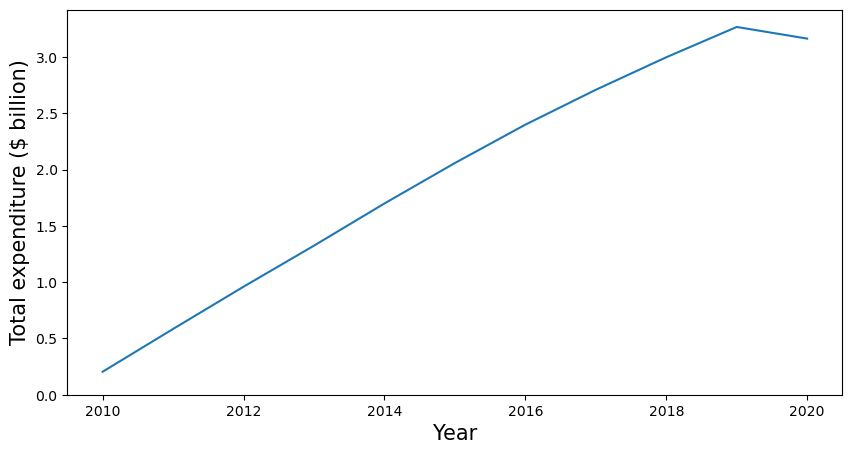

In [ ]:
# Plot aggregation
plt.figure(figsize=(10, 5))

plt.plot(total_exp.index,total_exp/1000000000)
plt.ylabel('Total expenditure ($ billion)',size=15)
plt.xlabel('Year',size=15)
plt.ylim(bottom=0)

plt.savefig('../figures/agg_1.png', dpi=100)

### Average monthly entertainment expenditure in 2020

In [ ]:
%%time

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR', 'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

# Create empty total expenditure dataframe
# total_exp = pd.DataFrame(columns=['CUST_ID','MONTH','AMOUNT'])
df_list = []

count = 0
while True:
    
    df = get_rows(steps,count,names)

    # Calculate monthly totals for each customer
    df_2020 = df[(df.YEAR==2020) & (df.EXP_TYPE=='Entertainment')]
    sum_exp = df_2020.groupby(['CUST_ID','MONTH'],as_index=False)['AMOUNT'].sum()
    
    # Append monthly totals
    df_list.append(sum_exp)
    count += 1
    print(count, end=' ')
    if len(df) != steps:
        break
    # total_exp = total_exp.append(sum_exp)
    
    # # Aggregate again so CUST_ID and MONTH are unique
    # total_exp = total_exp.groupby(['CUST_ID','MONTH'],as_index=False)['AMOUNT'].sum()
    
    # count+=1
    # print(count,end=" ")
    # # Exit loop
    # if len(df)!=steps:
    #     break

total_exp = pd.concat(df_list, ignore_index=True)

total_exp = total_exp.groupby(['CUST_ID','MONTH'],as_index=False)[AMOUNT].sum()

# Final aggregations
avg_exp = sum_exp.groupby(['MONTH'])['AMOUNT'].mean()

print(avg_exp)

1 

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_5273/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,


2 

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_5273/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,


3 4 5 6 7 8 9 10 11 12 13 14 15 16 

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_5273/1479968977.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,


17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [ ]:
# Plot aggregation
plt.figure(figsize=(10, 5))
plt.plot(avg_exp.index,avg_exp)
plt.ylabel('Average entertainment expenditure',size=12)
plt.xlabel('Month',size=15)
plt.ylim(bottom=0)

plt.savefig('../figures/agg_2.png', dpi=100)

NameError: name 'avg_exp' is not defined

<Figure size 1000x500 with 0 Axes>